In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [6]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. 
#### Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship. 
#### You may also want to check the mutual relationship by plotting the two variables using a swarmplot.

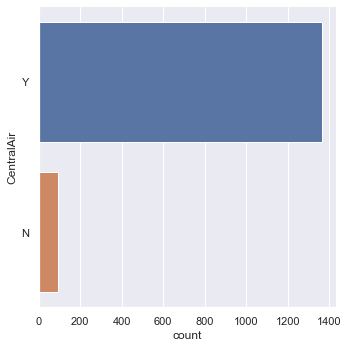

In [7]:
houseCentralAir = pd.DataFrame(houseData['CentralAir']) 
houseSalePrice = pd.DataFrame(houseData['SalePrice'])  

# Count Plot for CentralAir
sb.catplot(y = "CentralAir", data = houseCentralAir, kind = "count")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

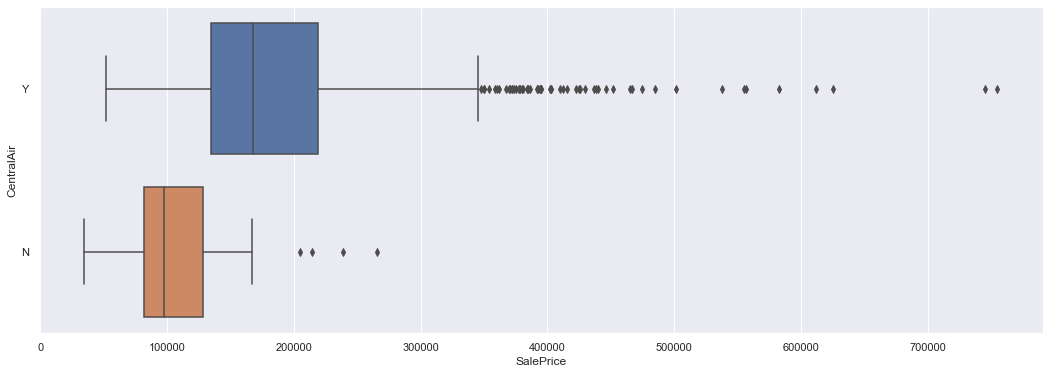

In [8]:
# Create a joint dataframe by concatenating CentralAir and SalePrice
dataDF = pd.concat([houseCentralAir, houseSalePrice], axis = 1)

# Joint Boxplot of CentralAir against SalePrice
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = dataDF, orient = "h")
# NOTE THAT CATEGORICAL VARIABLE CentralAir HAS TO BE Y-AXIS

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

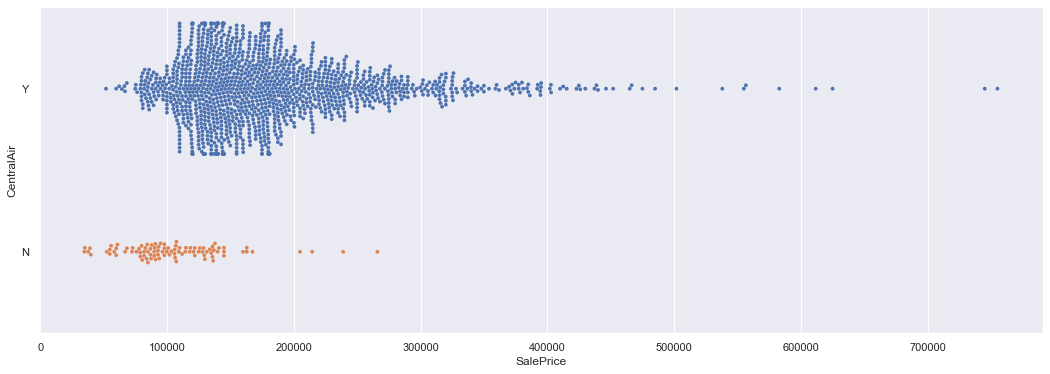

In [9]:
# Joint Swarmplot of CentralAir against SalePrice
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = dataDF, orient = "h", size = 3.8)
# Size is 3.8, threshold before some data points cannot be displayed

#### b) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [10]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Regression with Random Train-Test Split
from sklearn.model_selection import train_test_split

#### c) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows)

In [11]:
# Split the Dataset into Train and Test
houseData_train, houseData_test = train_test_split(houseData, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseData_train.shape) # 1100 rows, 81 cols
print("Test Set  :", houseData_test.shape) # 360 rows, 81 cols

Train Set : (1100, 81)
Test Set  : (360, 81)


#### d) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables. 
* y_train = pd.DataFrame(houseData_train['CentralAir'])
* X_train = pd.DataFrame(houseData_train['SalePrice']) 


In [12]:
y_train = pd.DataFrame(houseData_train['CentralAir']) # response
X_train = pd.DataFrame(houseData_train['SalePrice']) # predictor

dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

#### e) Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed).

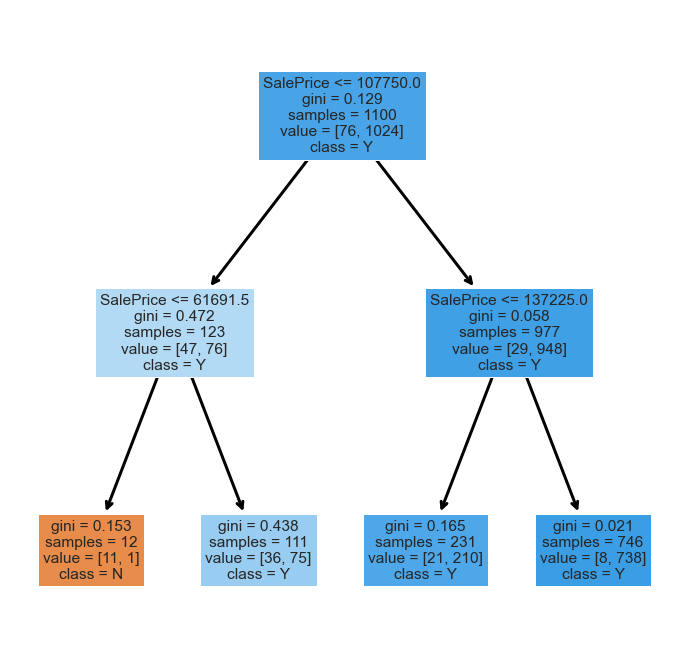

In [13]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### f) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix. 

#### Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94



<AxesSubplot:>

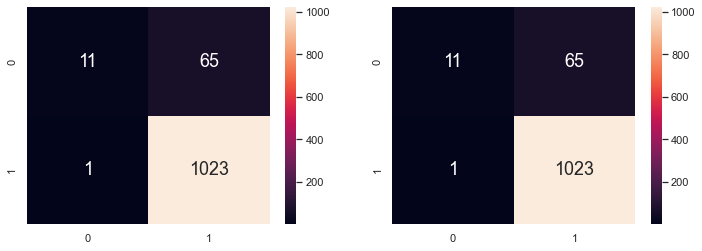

In [14]:
# recall train variables and assign test variables
y_train = pd.DataFrame(houseData_train['CentralAir']) # response
X_train = pd.DataFrame(houseData_train['SalePrice']) # predictor
y_test = pd.DataFrame(houseData_train['CentralAir']) # response
X_test = pd.DataFrame(houseData_train['SalePrice']) # predictor

# Predict CentralAir values corresponding to SalePrice
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Problem 2 : Predicting CentralAir using Other Variables
- Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'one-by-one to obtain individual Decision Trees. 


- Discuss with your Friends about the models, compare the Classification Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'

Train Set : (1100, 81)
Test Set  : (360, 81)


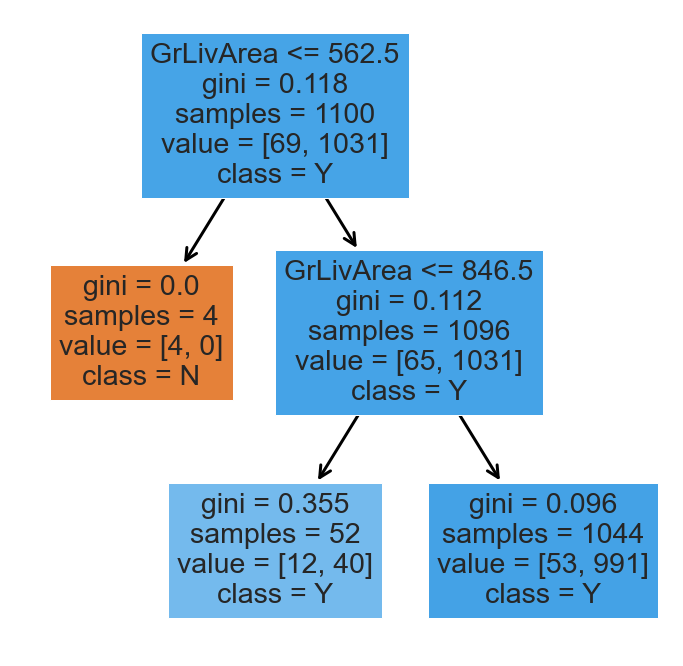

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9409090909090909

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9409090909090909



<AxesSubplot:>

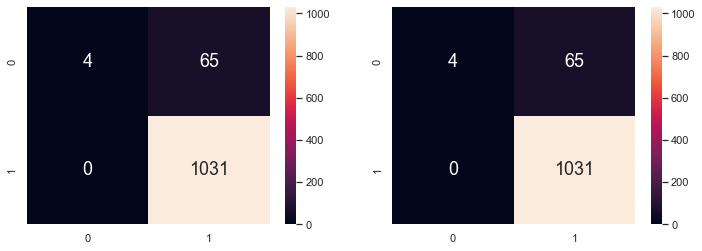

In [18]:
# GrLivArea

# Split the Dataset into Train and Test
houseData_train, houseData_test = train_test_split(houseData, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseData_train.shape) # 1100 rows, 81 cols
print("Test Set  :", houseData_test.shape) # 360 rows, 81 cols

# recall train variables and assign test variables
y_train = pd.DataFrame(houseData_train['CentralAir']) # response
X_train = pd.DataFrame(houseData_train['GrLivArea']) # predictor
y_test = pd.DataFrame(houseData_train['CentralAir']) # response
X_test = pd.DataFrame(houseData_train['GrLivArea']) # predictor


dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


# Predict CentralAir values corresponding to SalePrice
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Train Set : (1100, 81)
Test Set  : (360, 81)


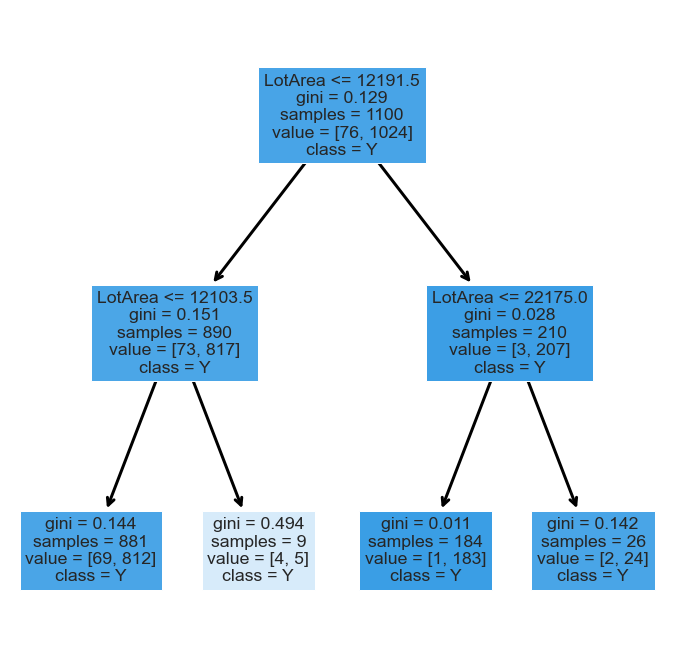

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9309090909090909

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9309090909090909



<AxesSubplot:>

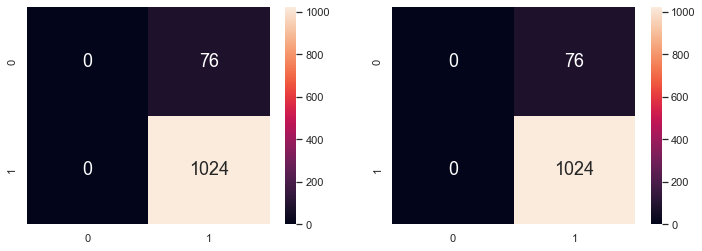

In [19]:
# LotArea

# Split the Dataset into Train and Test
houseData_train, houseData_test = train_test_split(houseData, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseData_train.shape) # 1100 rows, 81 cols
print("Test Set  :", houseData_test.shape) # 360 rows, 81 cols

# recall train variables and assign test variables
y_train = pd.DataFrame(houseData_train['CentralAir']) # response
X_train = pd.DataFrame(houseData_train['LotArea']) # predictor
y_test = pd.DataFrame(houseData_train['CentralAir']) # response
X_test = pd.DataFrame(houseData_train['LotArea']) # predictor


dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


# Predict LotArea values corresponding to SalePrice
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Train Set : (1100, 81)
Test Set  : (360, 81)


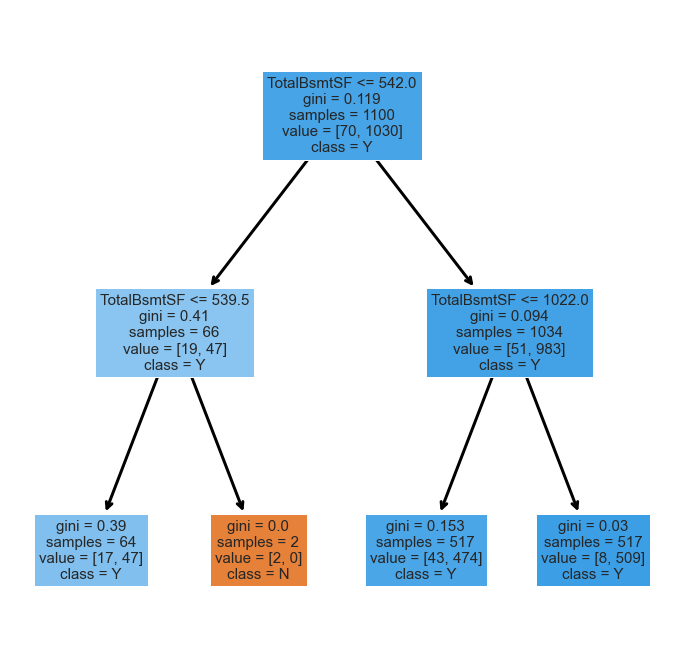

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9381818181818182

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9381818181818182



<AxesSubplot:>

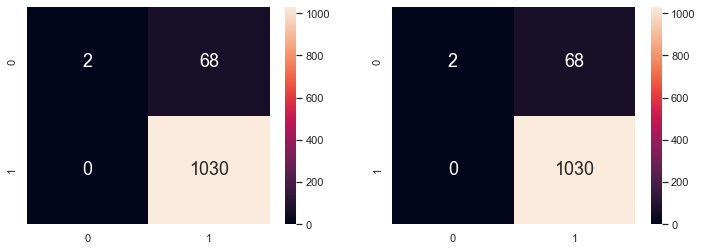

In [20]:
# TotalBsmtSF

# Split the Dataset into Train and Test
houseData_train, houseData_test = train_test_split(houseData, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseData_train.shape) # 1100 rows, 81 cols
print("Test Set  :", houseData_test.shape) # 360 rows, 81 cols

# recall train variables and assign test variables
y_train = pd.DataFrame(houseData_train['CentralAir']) # response
X_train = pd.DataFrame(houseData_train['TotalBsmtSF']) # predictor
y_test = pd.DataFrame(houseData_train['CentralAir']) # response
X_test = pd.DataFrame(houseData_train['TotalBsmtSF']) # predictor


dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


# Predict TotalBsmtSF values corresponding to SalePrice
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Conclusion

**GrLivArea is the best variable to predict SalePrice as it has the highest classification accuracy and lowest false positives and highest true positives**